In [35]:
%matplotlib inline
# Import modules!
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Creating a function that generates a horizontal barchart 
def create_bar_chart(variable1,variable2):
    plt.figure(figsize=(10,7))
    ax = sns.countplot(y=variable1, hue=variable2, data=result,palette='Set1')

In [36]:
# loading the csv file
source_data = pd.read_csv("adult.csv")
source_data.head()
# Check the type of our features
source_data.dtypes
# Run the descriptive statistic 
source_data.describe()
# create new dataframe that exclude the education.num
result = source_data
del result["education.num"]
result.head()

,age,workclass,fnlwgt,education,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [37]:
# Descriptive Statistic of The Dataset 
result.describe(include='all')


,age,workclass,fnlwgt,education,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
count,32561.000000,32561,3.256100e+04,32561,32561,32561,32561,32561,32561,32561.000000,32561.000000,32561.000000,32561,32561
unique,NaN,9,NaN,16,7,15,6,5,2,NaN,NaN,NaN,42,2
top,NaN,Private,NaN,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,NaN,NaN,NaN,United-States,<=50K
freq,NaN,22696,NaN,10501,14976,4140,13193,27816,21790,NaN,NaN,NaN,29170,24720
mean,38.581647,NaN,1.897784e+05,NaN,NaN,NaN,NaN,NaN,NaN,1077.648844,87.303830,40.437456,NaN,NaN
std,13.640433,NaN,1.055500e+05,NaN,NaN,NaN,NaN,NaN,NaN,7385.292085,402.960219,12.347429,NaN,NaN
min,17.000000,NaN,1.228500e+04,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,1.000000,NaN,NaN
25%,28.000000,NaN,1.178270e+05,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
50%,37.000000,NaN,1.783560e+05,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
75%,48.000000,NaN,2.370510e+05,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,45.000000,NaN,NaN


Looking at the summary statistic of the variables, there are several facts that are interesting: 
        * The average age is 38.58, which means old population 
        * About 22700 people (70%) work in private sector
        * Most of the people in the dataset are White
        * 67% are male
        * The average capital gain is $1077
        * The average capital loss is $87. The max is $4356 while the min is 0
        * The average working hour per week is 40 hours which is typical. 
        


** What is the relationship between the quantitative variables in this dataset? What is the correlation, if any?**


,age,fnlwgt,capital.gain,capital.loss,hours.per.week
age,1.000000,-0.076646,0.077674,0.057775,0.068756
fnlwgt,-0.076646,1.000000,0.000432,-0.010252,-0.018768
capital.gain,0.077674,0.000432,1.000000,-0.031615,0.078409
capital.loss,0.057775,-0.010252,-0.031615,1.000000,0.054256
hours.per.week,0.068756,-0.018768,0.078409,0.054256,1.000000


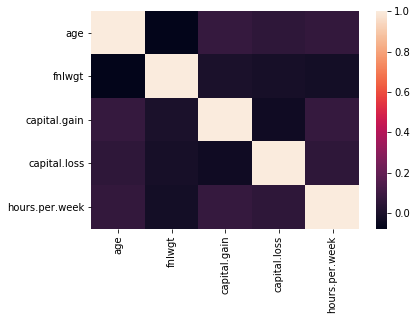

In [5]:
# creating a heatmap and the correlation coefficient to check the relationship of the variables
corr = result.corr()
corr = (corr)
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

corr

Based on the heatmap and the correlation coefficient,there is correlation between quatitative variables in the dataset

**What is the relationship between the level of education and level of income, if any?**
** We would like to know if there is any connection between education level and income (more education = more income)**

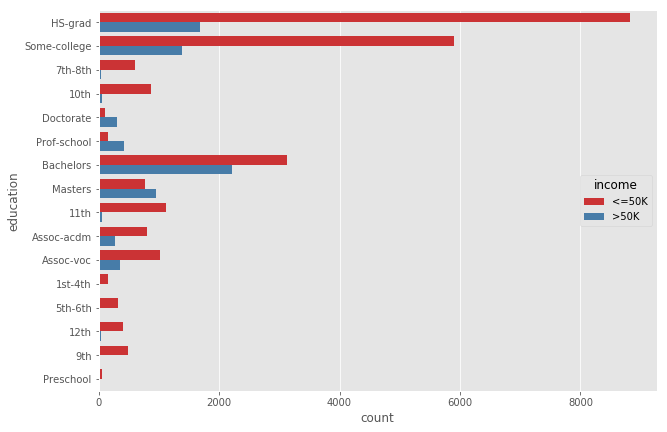

In [38]:
# create a bar chart to check the connection between income and education
education = result['education']
income = result['income']
create_bar_chart(education,income)


There is a connection between income and education level. More education equals more income. People who got PHD or Master's degrees earn more than 50k per year. 
People who study preschool to 12th earn less than 50k per year. Only several people in this group can earn more than 50k per year.



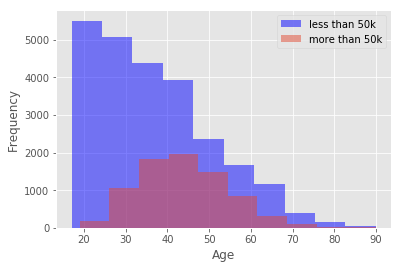

In [34]:
age = result['age']
sns.set_style()
# Create histogram of age with income
age_lessincome = age[income == '<=50K']
age_highincome = age[income == '>50K']
plt.hist(age_lessincome, alpha=.50, label='less than 50k', bins=10,color = 'b')
plt.hist(age_highincome, alpha=.50, label='more than 50k', bins=10)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('')

plt.legend()

plt.show()

There is a normal distribution about age and people who earn more than 50k. The distribution of age and people who earn less than 50k is highly skewed to the right. 

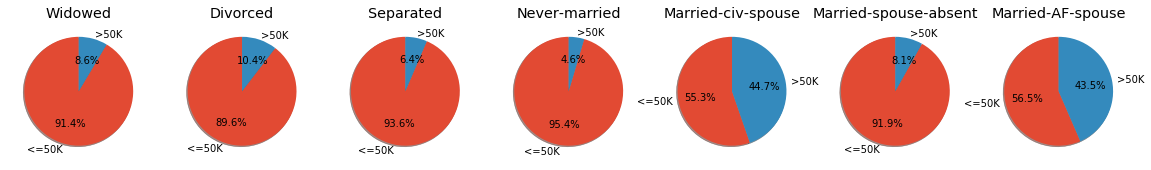

In [11]:

# create pie charts to check the connection between marital status and income
t_list = []
index = []
df = result['marital.status'].drop_duplicates()

for i, status in df.iteritems():
    
    count = result.groupby(by=result['marital.status'] == status)['income'].value_counts()
    
    data = count.tolist()[2:4]
  
    t_list.append(data)
    index.append(status)
    
df = pd.DataFrame(t_list).T

df.columns = index 

plt.style.use('ggplot')

labels = '<=50K', '>50K'

fig, axes = plt.subplots(1,7, figsize=(20,4))
for ax, col in zip(axes, df.columns):
    ax.pie(df[col], labels=labels, autopct='%1.1f%%', startangle=90, shadow=True)
    ax.set(ylabel='', title=col, aspect='equal')

plt.show()

# Option 2 
# df = pd.DataFrame(np.array(t_list), index=index)
# print(df.T)
# df.T.plot.pie(subplots=True, 
#               figsize=(20, 3), autopct='%1.1f%%', 
#               startangle=90, labels=labels,
#               title='Pie Chart by Marital Status and Income',legend=False,fontsize=14)



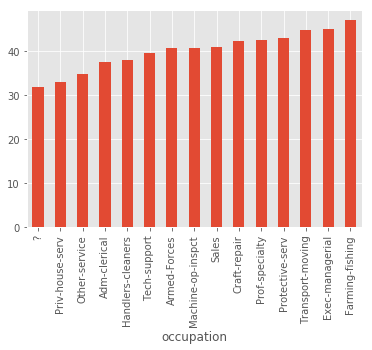

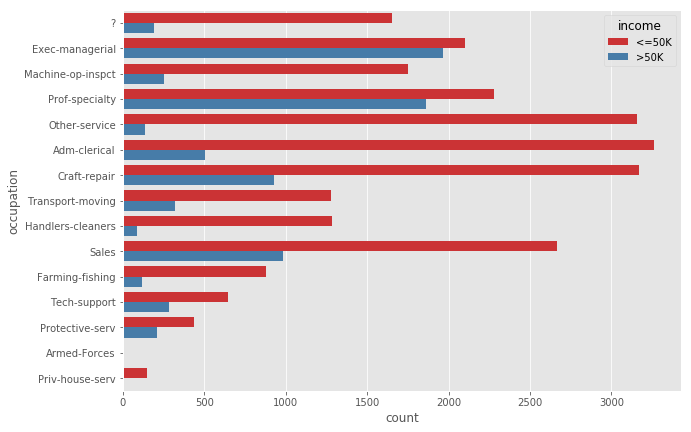

In [43]:
occupation_hours = result.groupby(by='occupation')['hours.per.week'].mean().sort_values()
occupation_hours.plot.bar()
create_bar_chart(result['occupation'],income)


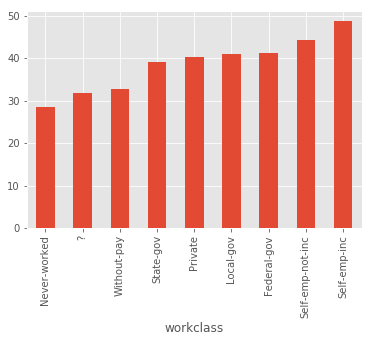

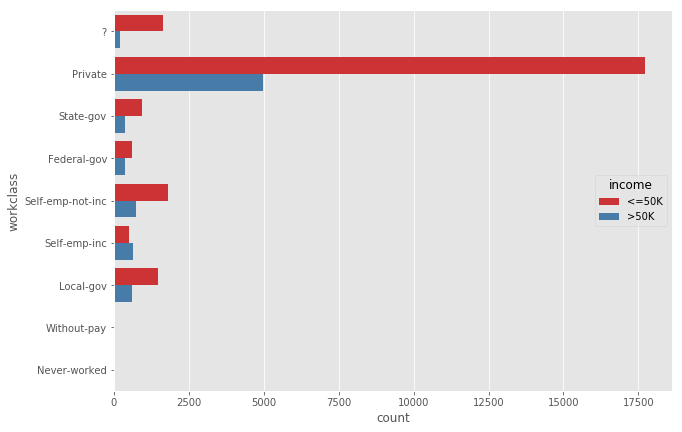

In [41]:
workclass_hours = result.groupby(by='workclass')['hours.per.week'].mean().sort_values()
workclass_hours.plot.bar()
create_bar_chart(result['workclass'],income)



In [46]:
result['race'].value_counts()

White                 27816
Black                  3124
Asian-Pac-Islander     1039
Amer-Indian-Eskimo      311
Other                   271
Name: race, dtype: int64

In [47]:
result['native.country'].value_counts()

United-States                 29170
Mexico                          643
?                               583
Philippines                     198
Germany                         137
Canada                          121
Puerto-Rico                     114
El-Salvador                     106
India                           100
Cuba                             95
England                          90
Jamaica                          81
South                            80
China                            75
Italy                            73
Dominican-Republic               70
Vietnam                          67
Guatemala                        64
Japan                            62
Poland                           60
Columbia                         59
Taiwan                           51
Haiti                            44
Iran                             43
Portugal                         37
Nicaragua                        34
Peru                             31
France                      

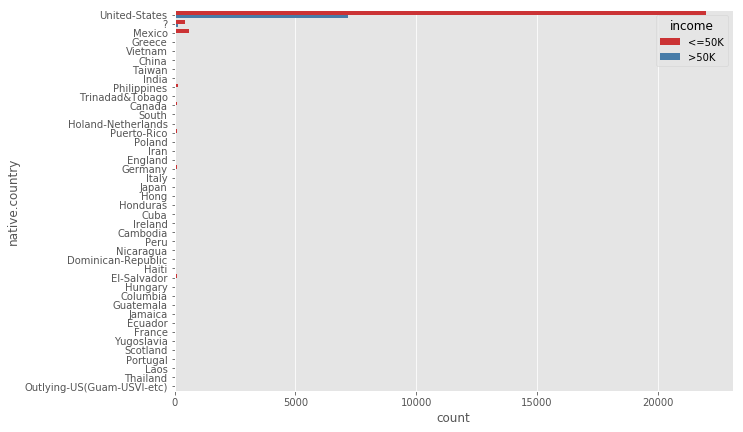

In [48]:
create_bar_chart(result['native.country'],income)